# Conceção e otimização de modelos de Machine Learning

### Dados
Neste trabalho, será usado o dataset <em>data.csv</em>

Este dataset contem casos 4 600 e 18 features, incluindo:

- date
- price
- bedrooms
- bathrooms
- sqft_living
- sqft_lot
- floors
- waterfront
- view
- condition
- sqft_above
- sqft_basement
- yr_built
- yr_renovated
- street
- city
- statezip
- country 

## Importar Bibliotecas

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
%matplotlib inline

## Ler Dados

In [70]:
# https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
data = pd.read_csv('datasets/healthcare-dataset-stroke-data.csv')

In [71]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [72]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [74]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## 1. Valores em Falta

In [75]:
data.nunique()


id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [76]:
data.duplicated().sum()

0

In [77]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<Axes: >

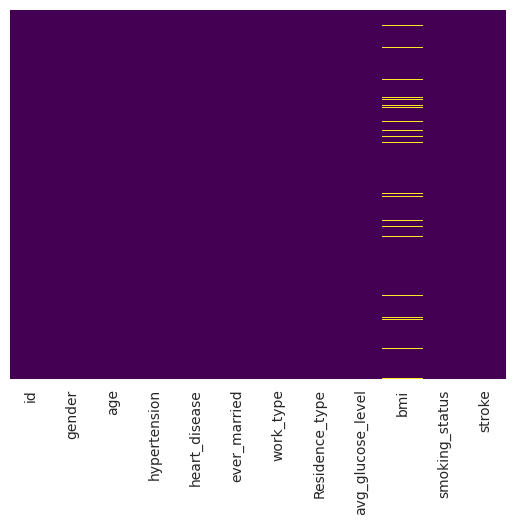

In [78]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [79]:
male_data = data[data['gender'] == 'Male']['bmi'].mean()
#male_data.mean()

female_data = data[data['gender'] == 'Female']['bmi'].mean()
#female_data.mean()

print(male_data, female_data)

28.64793635007459 29.065757680358992


In [80]:
#data[data['gender'] == 'Male', 'bmi'].fillna(male_data.round(1))
#data[data['gender'] == 'Female', 'bmi'].fillna(female_data.round(1))

#data.loc[data['gender'] == 'Female', 'bmi'] = female_data.round(1)
data['bmi'] = data.apply(lambda row: male_data if pd.isna(row['bmi']) and row['gender'] == 'Male' else row['bmi'], axis=1)
data['bmi'] = data.apply(lambda row: female_data if pd.isna(row['bmi']) and row['gender'] == 'Female' else row['bmi'], axis=1)

In [81]:
data['bmi'].isna().sum()

0

<Axes: >

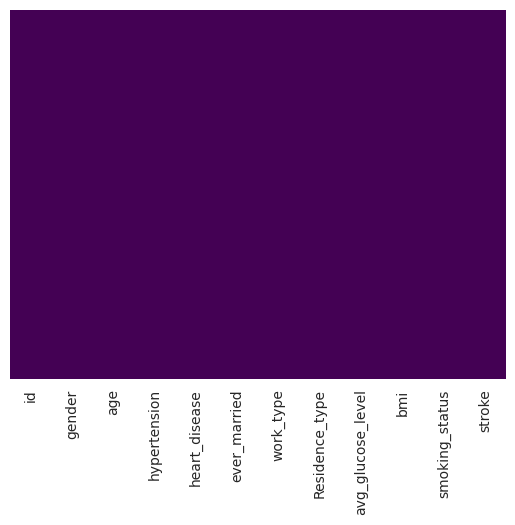

In [82]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [83]:
# drop line where gender is other

data.drop(data[data['gender'] == 'Other'].index, inplace=True)

#data.head()
data.nunique()

id                   5109
gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3978
bmi                   420
smoking_status          4
stroke                  2
dtype: int64

In [84]:
data.nunique()

id                   5109
gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3978
bmi                   420
smoking_status          4
stroke                  2
dtype: int64

### Drop or fill

In [85]:
data.drop(['id'],axis=1,inplace=True)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.065758,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


### OUTLIERS

In [86]:
#data['bmi'].astype('float')
data['bmi'].describe()
#data['bmi'].max()

count    5109.000000
mean       28.892790
std         7.698351
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

Price

In [87]:
from scipy import stats


# z_scores = stats.zscore(data['bmi'].astype(float))
# threshold = 3
# df_no_outliers = data[(z_scores < threshold)]
# print(df_no_outliers.shape)
# df_no_outliers['bmi'].astype(float).describe()

data['bmi'].astype(float)
lower_limit = data['bmi'].quantile(0.01)
upper_limit = data['bmi'].quantile(0.998)
data['bmi'] = data['bmi'].clip(lower_limit, upper_limit)
data['bmi'].describe()



count    5109.000000
mean       28.881480
std         7.549026
min        15.108000
25%        23.800000
50%        28.400000
75%        32.800000
max        60.900000
Name: bmi, dtype: float64

<Axes: xlabel='bmi'>

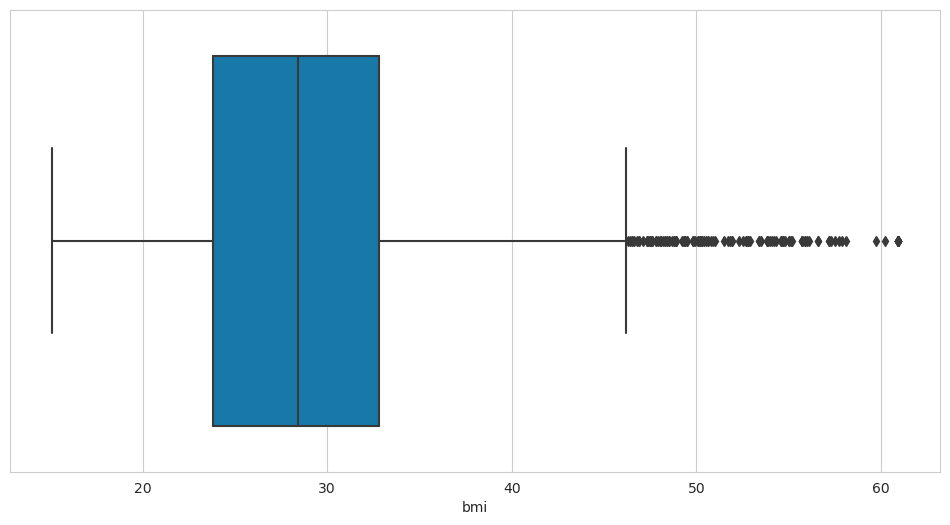

In [88]:
plt.figure(figsize=(12,6))
sns.boxplot(x=data['bmi'],palette='winter')

## 2. Tratamento de dados categóricos

In [89]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.065758,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [90]:
lb = LabelEncoder()

Work_typeLe = lb.fit(data['work_type'])

data['work_type'] = Work_typeLe.transform(data['work_type'])

data['work_type'].value_counts()

work_type
2    2924
3     819
4     687
0     657
1      22
Name: count, dtype: int64

In [91]:
Residence_typeLe = lb.fit(data['Residence_type'])

data['Residence_type'] = Residence_typeLe.transform(data['Residence_type'])

data['Residence_type'].value_counts()

Residence_type
1    2596
0    2513
Name: count, dtype: int64

In [92]:


#Smoking_statusLe = lb.fit(data['smoking_status'])

#data['smoking_status'] = Smoking_statusLe.transform(data['smoking_status'])

#data['smoking_status'].value_counts()


In [93]:
data = pd.concat([data.drop("smoking_status", axis=1), pd.get_dummies(data["smoking_status"])], axis=1)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke,Unknown,formerly smoked,never smoked,smokes
0,Male,67.0,0,1,Yes,2,1,228.69,36.600000,1,False,True,False,False
1,Female,61.0,0,0,Yes,3,0,202.21,29.065758,1,False,False,True,False
2,Male,80.0,0,1,Yes,2,0,105.92,32.500000,1,False,False,True,False
3,Female,49.0,0,0,Yes,2,1,171.23,34.400000,1,False,False,False,True
4,Female,79.0,1,0,Yes,3,0,174.12,24.000000,1,False,False,True,False


In [94]:
data['gender'] = data['gender'].map({'Male': 1, 'Female': 0})
data['ever_married'] = data['ever_married'].map({'Yes': 1, 'No': 0})

In [95]:
data['gender'].value_counts()

gender
0    2994
1    2115
Name: count, dtype: int64

In [96]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke,Unknown,formerly smoked,never smoked,smokes
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,False,True,False,False
1,0,61.0,0,0,1,3,0,202.21,29.065758,1,False,False,True,False
2,1,80.0,0,1,1,2,0,105.92,32.500000,1,False,False,True,False
3,0,49.0,0,0,1,2,1,171.23,34.400000,1,False,False,False,True
4,0,79.0,1,0,1,3,0,174.12,24.000000,1,False,False,True,False


In [97]:
# bmi_group = []
# for bmi in data['bmi']:
#     if bmi < 18.5:
#         bmi_group.append("underweight")
    
#     elif (bmi >= 18.5) & (bmi <= 24.9):
#         bmi_group.append("normal")
    
#     elif (bmi >= 25.0) & (bmi <= 29.9):
#         bmi_group.append("overweight")
    
#     elif (bmi >= 30.0) & (bmi <= 34.9):
#         bmi_group.append("obese")
    
#     elif bmi >= 35.0:
#         bmi_group.append("extremly obese")
    
# data['bmi_group'] = bmi_group   
# stroke = data.drop(['bmi'], axis=1)

In [98]:
'Desconhecido:-1','Muito Baixo:0', 'Baixo:1', 'Médio:2', 'Alto:3', 'Muito Alto:4'
labels = ['0','1', '2', '3', '4']

bins = [0, 19, 25, 30, 35, 500]

# Crie uma nova coluna 'Levy_Category' com as categorias
data['bmi'] = pd.cut(data['bmi'], bins=bins, labels=labels, right=False)

# Visualize as categorias
print(data['bmi'].value_counts())

bmi
2    1610
1    1175
3    1000
4     920
0     404
Name: count, dtype: int64


In [99]:
# price_count = data['price'].value_counts()
# sns.set(style="darkgrid")
# sns.barplot(x=price_count.index, y=price_count.values)
# plt.title('Frequency Distribution of houses')
# plt.ylabel('Number of houses', fontsize=12)
# plt.xlabel('Labels (price)', fontsize=12)
# plt.show()

In [100]:
# labels = data['price'].astype('category').cat.categories.tolist()
# counts = data['price'].value_counts()
# sizes = [counts[var_cat] for var_cat in labels]
# fig1, ax1 = plt.subplots()
# ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
# ax1.axis('equal')
# plt.show()

In [101]:
# data.Mileage = data.Mileage.map(lambda x: x.rstrip(' km'))
# data.Mileage = data.Mileage.astype('float')
# #data['Mileage'] = data['Mileage'].str.replace(' km', '')
# print(data['Mileage'].median())
# print("max -> " ,data['Mileage'].max(), "| min -> ", data['Mileage'].min())

In [102]:
# #'Novo :0', 'Poucos Km's:1', 'Medio Km's:2', 'Muitos km's :3', 'Muitos Muitos Km's:4'
# labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# bins = [ 0, 1000, 2000, 5000, 10000, 20000, 50000, 100000, 250000 , 500000, 10000000000000]

# # Crie uma nova coluna 'Levy_Category' com as categorias
# data['Price'] = pd.cut(data['Price'], bins=bins, labels=labels, right=False)

# # Visualize as categorias
# print(data['Price'].value_counts())

Text(0.5, 1.0, 'Correlação entre variáveis e stroke')

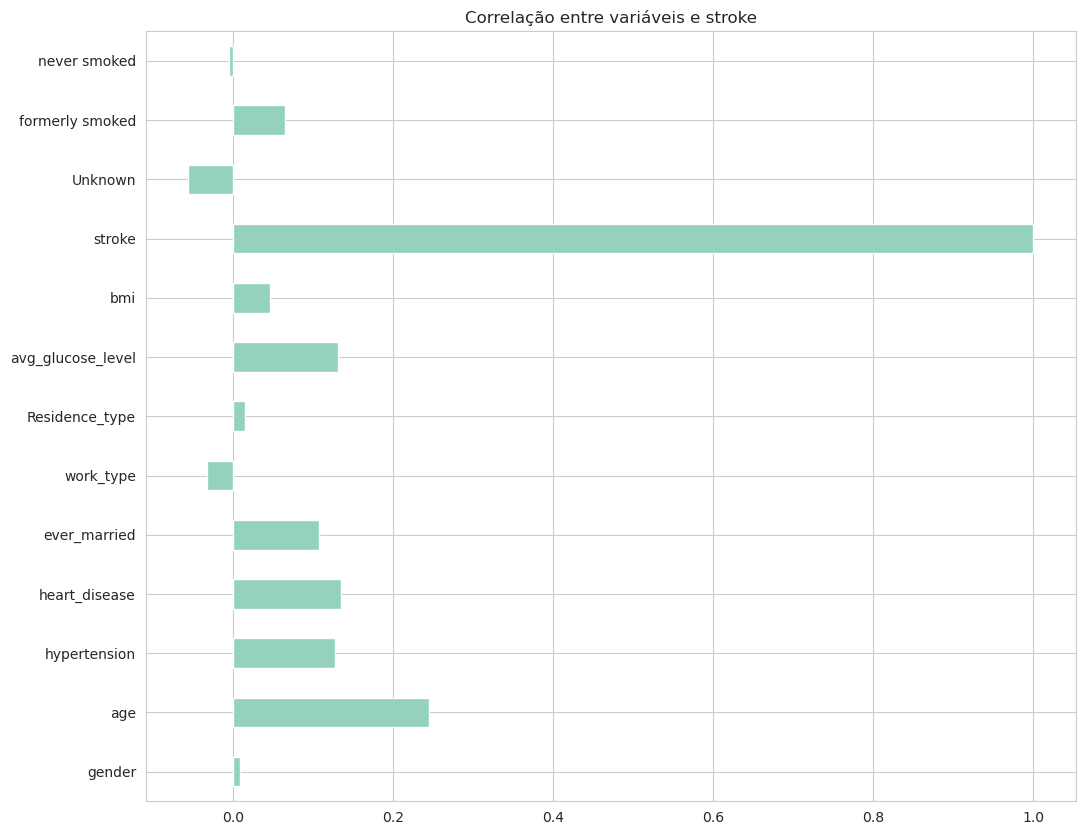

In [103]:
plt.figure(figsize=(12,10))
corr = data.corr()["stroke"]
corr[np.argsort(corr, axis=0)[::-1]]
corr = corr[:-1] 
corr.plot(kind='barh') 

plt.title("Correlação entre variáveis e stroke")

<Axes: >

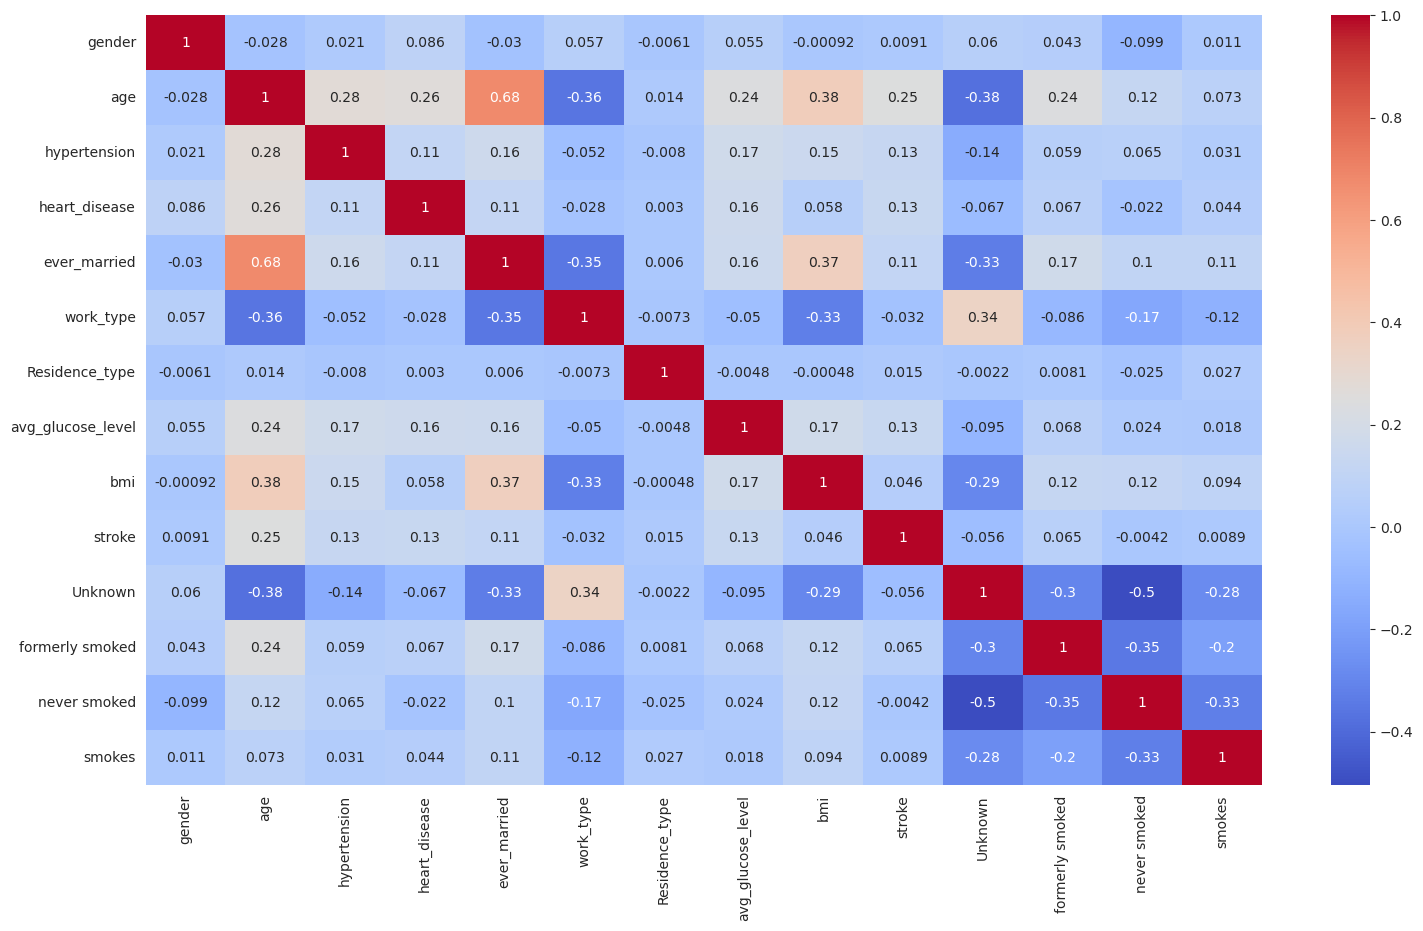

In [104]:
plt.subplots(figsize=(18,10))
sns.heatmap(data.corr(), annot = True, cmap='coolwarm')

In [105]:
#sns.pairplot(data)

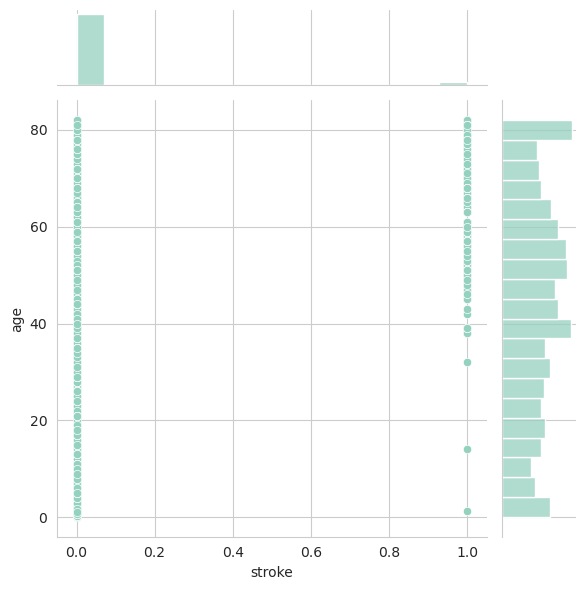

In [106]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')
sns.jointplot(x='stroke',y='age',data=data)

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             5109 non-null   int64   
 1   age                5109 non-null   float64 
 2   hypertension       5109 non-null   int64   
 3   heart_disease      5109 non-null   int64   
 4   ever_married       5109 non-null   int64   
 5   work_type          5109 non-null   int64   
 6   Residence_type     5109 non-null   int64   
 7   avg_glucose_level  5109 non-null   float64 
 8   bmi                5109 non-null   category
 9   stroke             5109 non-null   int64   
 10  Unknown            5109 non-null   bool    
 11  formerly smoked    5109 non-null   bool    
 12  never smoked       5109 non-null   bool    
 13  smokes             5109 non-null   bool    
dtypes: bool(4), category(1), float64(2), int64(7)
memory usage: 424.3 KB


In [108]:
#data = pd.pandas.get_dummies(data)

#data

# ----------------------

### Set up the dataframe

In [109]:
data_target = data.stroke

In [110]:
data_feat = data.drop('stroke',axis=1)

In [111]:
data_feat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             5109 non-null   int64   
 1   age                5109 non-null   float64 
 2   hypertension       5109 non-null   int64   
 3   heart_disease      5109 non-null   int64   
 4   ever_married       5109 non-null   int64   
 5   work_type          5109 non-null   int64   
 6   Residence_type     5109 non-null   int64   
 7   avg_glucose_level  5109 non-null   float64 
 8   bmi                5109 non-null   category
 9   Unknown            5109 non-null   bool    
 10  formerly smoked    5109 non-null   bool    
 11  never smoked       5109 non-null   bool    
 12  smokes             5109 non-null   bool    
dtypes: bool(4), category(1), float64(2), int64(6)
memory usage: 384.4 KB


## Exploratory Data Analysis

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score

In [113]:
x_train, x_test, y_train, y_test = train_test_split(data_feat, np.ravel(data_target), test_size=0.30, random_state=2021)

<Axes: xlabel='Stroke', ylabel='count'>

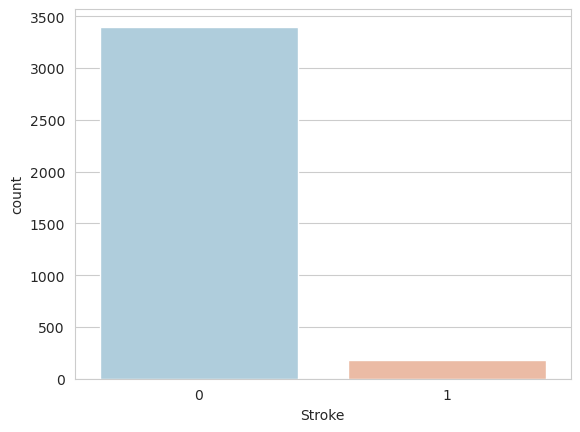

In [114]:
sns.set_style('whitegrid')
sns.countplot(x='Stroke',data=pd.DataFrame(y_train, columns=['Stroke']),palette='RdBu_r')

<Axes: xlabel='Stroke', ylabel='count'>

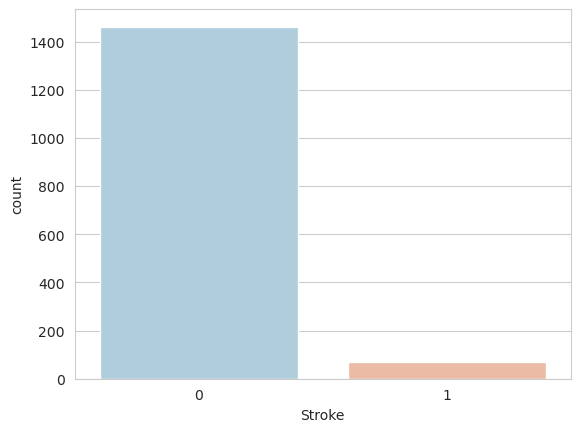

In [115]:
sns.set_style('whitegrid')
sns.countplot(x='Stroke',data=pd.DataFrame(y_test, columns=['Stroke']),palette='RdBu_r')

In [116]:
x_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,Unknown,formerly smoked,never smoked,smokes
984,1,19.0,0,0,1,2,1,99.14,2,False,False,True,False
1203,1,21.0,0,0,0,2,1,82.71,1,False,True,False,False
1064,1,55.0,0,0,1,3,1,93.67,2,True,False,False,False
1254,0,45.0,0,0,1,2,0,81.02,4,False,False,True,False
275,0,67.0,0,0,1,0,0,94.61,2,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3935,0,50.0,0,0,1,3,0,61.54,2,True,False,False,False
2669,0,53.0,0,0,0,2,1,129.43,2,False,False,True,False
1152,1,46.0,0,0,1,2,0,138.07,1,False,False,True,False
3414,1,13.0,0,0,0,2,1,141.09,1,True,False,False,False


In [117]:
x_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,Unknown,formerly smoked,never smoked,smokes
2085,1,70.0,0,0,1,2,0,72.56,3,False,True,False,False
2813,1,43.0,0,0,1,2,1,91.13,3,False,False,True,False
451,1,13.0,0,0,0,4,1,122.31,0,False,False,True,False
3134,0,73.0,0,1,1,2,0,102.46,2,False,False,True,False
4768,0,17.0,0,0,0,2,0,120.96,1,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4440,1,55.0,0,0,1,2,1,82.26,2,True,False,False,False
192,1,59.0,0,0,1,3,0,118.03,4,False,False,False,True
1666,0,3.0,0,0,0,4,1,57.33,0,True,False,False,False
938,0,23.0,0,0,0,2,0,92.87,3,False,False,True,False


In [118]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [119]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

# ------------------------

In [120]:
from sklearn.model_selection import cross_val_score

In [121]:
cross_valid_model = SVC(random_state=2021)
scores = cross_val_score(cross_valid_model, data_feat, np.ravel(data_target), cv=10)
scores

array([0.95107632, 0.95107632, 0.95107632, 0.95107632, 0.95107632,
       0.95107632, 0.95107632, 0.95107632, 0.95107632, 0.95294118])

In [122]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.95 accuracy with a standard deviation of 0.00


In [123]:
model = SVC(random_state=2021)
model.fit(x_train,y_train)

SVC(random_state=2021)

In [124]:
predictions = model.predict(x_test)

In [125]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score

In [126]:
print("%0.2f accuracy" % (accuracy_score(y_test,predictions)))

0.95 accuracy


In [127]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1462
           1       0.00      0.00      0.00        71

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.91      0.95      0.93      1533



/home/edini22/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/edini22/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/edini22/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

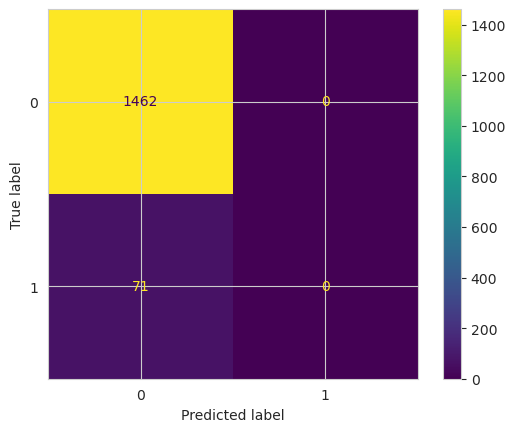

In [128]:
ConfusionMatrixDisplay.from_predictions(y_test, predictions)
plt.show()

# ---------------------

In [129]:
from sklearn.model_selection import GridSearchCV

In [130]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

In [131]:
grid = GridSearchCV(SVC(random_state=2021),param_grid,refit=True,verbose=3)

In [132]:
#model = SVC(random_state=2021)
#model.fit(x_train,y_train)

In [133]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.950 total time=   0.5s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.951 total time=   0.5s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.951 total time=   0.5s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.950 total time=   0.5s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.950 total time=   0.6s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.950 total time=   0.3s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.951 total time=   0.3s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.951 total time=   0.3s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.950 total time=   0.3s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.950 total time=   0.3s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.950 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.951 total time=   0.1s
[CV 3/5] END .....C=0.1, gam

GridSearchCV(estimator=SVC(random_state=2021),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [134]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [135]:
grid.best_estimator_

SVC(C=0.1, gamma=1, random_state=2021)

In [136]:
grid_predictions = grid.predict(x_test)
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1462
           1       0.00      0.00      0.00        71

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.91      0.95      0.93      1533



/home/edini22/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/edini22/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/edini22/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

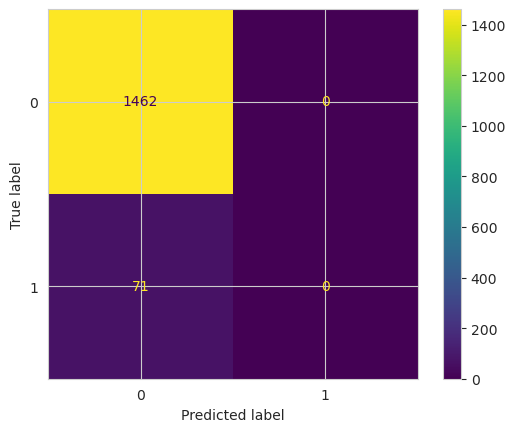

In [137]:
ConfusionMatrixDisplay.from_predictions(y_test, grid_predictions)
plt.show()